> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question
of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

> Data Dictionary:
* PatientId: Identification of a patient.
* AppointmentID: Identification of each appointment.
* Gender: Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.
* AppointmentDay: The day of the actuall appointment, when they have to visit the doctor.
* ScheduledDay: The day someone called or registered the appointment, this is before appointment of course.
* Age: How old is the patient.
* Neighbourhood: indicates the location of the hospital.
* Scholarship: True of False . indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
* Hipertension: True or False
* Diabetes: True or False
* Alcoholism: True or False
* Handcap: True or False
* SMS_received: 1 or more messages sent to the patient.
* No-show: True or False. it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### **Import the necessary libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### importing data into dataframe

In [2]:
#read data from csv into datafram
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
#read first 5 rows from dataset
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Data shape

In [3]:
#Extract data shape 
print("Number of records (patients): ", df.shape[0])
print("Number of columns (features): ", df.shape[1])

Number of records (patients):  110527
Number of columns (features):  14


#### Data Information

In [4]:
#data information ex:size and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### notes about data
* all columns the same size no missing data
* ScheduledDay and AppointmentDay are saved as str(object) need to be converted to datetime
* columns names have typo

### Data Summary

In [5]:
# Generating descriptive statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### Comments:
* patients age mean around 37
* most of patients are no show up


#### Check data for null value

In [6]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

##### There is no null value

### Check data for duplicated value

In [7]:
sum(df.duplicated())

0

#### There is no duplicated values

### Check columns values

In [8]:
# PatientId and AppointmentID will be drop to make data processing faster:
#Gender
print('Gender Values: ',df.Gender.unique())
#ScheduledDay
print('ScheduledDay Values: ',df.ScheduledDay.unique())
#AppointmentDay
print('AppointmentDay Values: ',df.AppointmentDay.unique())
#Age
print('Age Values: ',sorted(df.Age.unique()))
#Neighbourhood
print('Neighbourhood Values: ',df.Neighbourhood.unique())
#Scholarship
print('Scholarship Values: ',df.Scholarship.unique())
#Diabetes
print('Diabetes Values: ',df.Diabetes.unique())
#Alcoholism
print('Alcoholism Values: ',df.Alcoholism.unique())
#Handicap
print('Handicap Values: ',df.Handcap.unique())
#SMS_received
print('SMS_received Values: ',df.SMS_received.unique())
#No_show
print('No-show Values: ',df['No-show'].unique())

Gender Values:  ['F' 'M']
ScheduledDay Values:  ['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']
AppointmentDay Values:  ['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z' '2016-06-01T00:00:00Z' '2016-06-08T00:00:00Z']
Age Values:  [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 

##### Commments
* Age contains minus and zero age
* No show will be normalized to 0 and 1 to be essay to use in analysis


### Data Cleaning

In [9]:
#drop columns as i will not use them in analysis
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

### Rename Columns: correct typing errors

In [10]:
df.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap','No-show':'No_show'},inplace=True)

#### Mappe no show to 0 and 1

In [11]:
df.No_show[df.No_show=='Yes']='1'
df.No_show[df.No_show=='No']='0'
#convert for numeric
df.No_show=pd.to_numeric(df.No_show)

/home/aya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/aya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
#check changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null int64
dtypes: int64(8), object(4)
memory usage: 10.1+ MB


#### Check Age if contains age less than or equal 0 or minus and replace it

In [13]:
age_mean=df.Age.mean()
#replace 0 and minus value by age mean
df.Age[df.Age<=0]=age_mean
sorted(df.Age.unique())

/home/aya/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 37.08887421173107,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 102.0,
 115.0]

### Converting ScheduledDay and AppointmentDay from Object (String) to Datestime datatype

In [14]:
df.ScheduledDay=pd.to_datetime(df.ScheduledDay)
df.AppointmentDay = pd.to_datetime(df.AppointmentDay)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns, UTC]
AppointmentDay    110527 non-null datetime64[ns, UTC]
Age               110527 non-null float64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null int64
dtypes: datetime64[ns, UTC](2), float64(1), int64(7), object(2)
memory usage: 10.1+ MB


#### Create new column for patient waiting time as i will need it in analysis 

In [27]:
#Calculate diff between days and get abs to avoid negative days 
df['WaitingTime'] = (df.AppointmentDay - df.ScheduledDay).dt.days.abs()
df['WaitingTime'].unique()

array([  1,   2,   0,   3,   8,  28,   9,  22,  10,  17,  16,  13,  27,
        23,  20,  14,  15,  21,  42,  29,  30,  41,  31,  55,  44,  45,
        38,  36,  37,  43,  49,  59,  51,  52,  64,  66,  90,  65,  83,
        77,  86, 114, 108,  62,  69,  71,  56,  57,  50,  58,  40,  48,
        72,  63,  19,  32,  33,   5,  34,  35,  11,  12,  39,  46,   7,
         4,   6,  24,  25,  47,  26,  18,  60,  54,  61, 175,  53,  76,
        68,  82,  75,  88,  80, 102,  78,  67,  74,  84, 111,  79,  85,
        97,  93, 141, 154, 161, 168, 103, 132, 124,  95,  87,  89, 150,
       125, 126, 110, 118,  73,  70,  81, 107, 109, 101, 121, 100, 104,
        91,  96,  92, 106,  94, 138, 131, 178, 116, 145, 122])

#### Create a new column ‘WeekDay' to be used in analysis which days people don’t show up more often.

In [37]:
df['WeekDay'] = df['AppointmentDay'].dt.dayofweek
replace_map = {'WeekDay': {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday'}}
df.replace(replace_map, inplace=True)

In [38]:
df['WeekDay'].value_counts()

Wednesday    25867
Tuesday      25640
Monday       22715
Friday       19019
Thursday     17247
Saturday        39
Name: WeekDay, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns, UTC]
AppointmentDay    110527 non-null datetime64[ns, UTC]
Age               110527 non-null float64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No_show           110527 non-null int64
WaitingTime       110527 non-null int64
WeekDay           110527 non-null object
dtypes: datetime64[ns, UTC](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


<a id='eda'></a>
## Exploratory Data Analysis

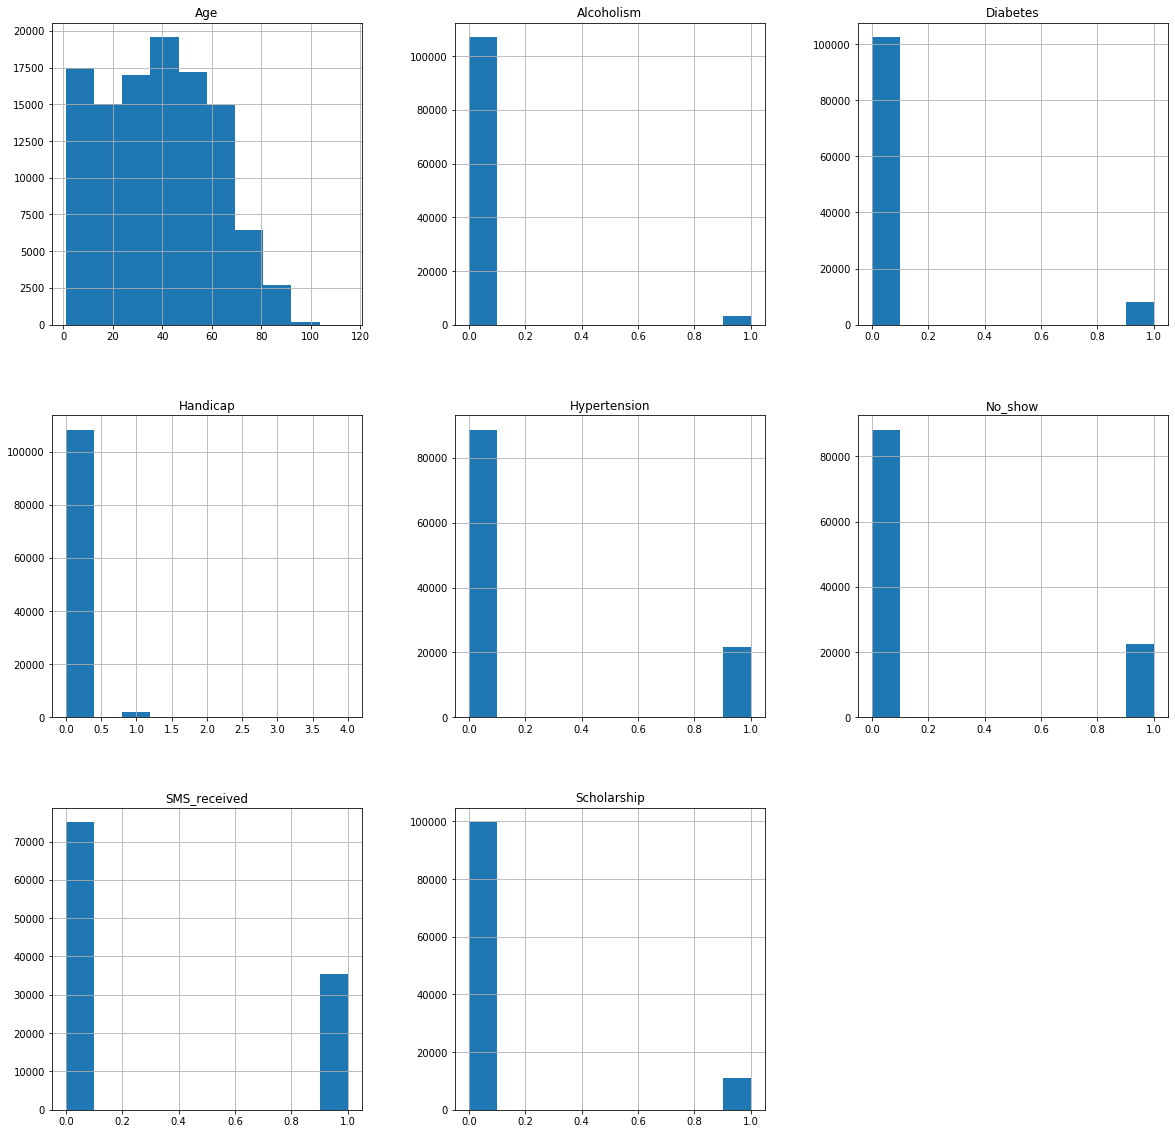

In [43]:
df.hist(figsize=(20,20));

#### Based on the above histogram i will focus on Ages, SMS_recieved and Scholarship features to analysis showup

### What is the appointment show-up vs. no show-up rate ?

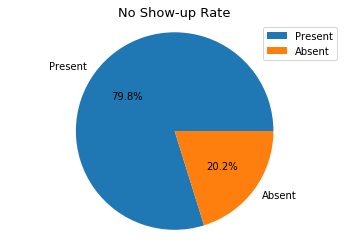

In [76]:
data = df['No_show'].value_counts().values
labels =['Present','Absent']
plt.pie(data,labels=labels, autopct='%1.1f%%')
plt.title("No Show-up Rate", fontsize = 13)
plt.axis('equal')
plt.legend();


Conculusion: 78.8 most of patients are show up in appointment day while 20.2 are not show up, we will study more features to see the relation between them and the show up rate

Text(0.5, 1.0, 'Distribution of Age')

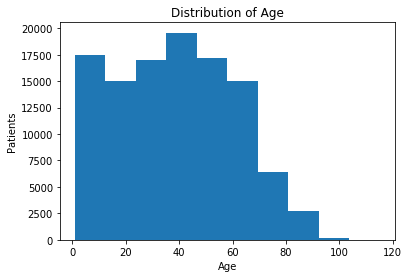

In [97]:
# Distrubuation of patient age
age_hist = df['Age'].plot.hist(bins=10)
age_hist.set_xlabel("Age")
age_hist.set_ylabel("Patients")
age_hist.set_title('Distribution of Age')

In [106]:
# the Average of No Show up patients age
df.Age[df.No_show==1].mean()

35.379532712993374

In [107]:
# the Average of Show up patients age
df.Age[df.No_show==0].mean()

39.00986105668502

Conclusion: Age distribution shows that older people between (40-60) has less no-show compareded to the younger. While the mean of no show and show ages shows that there's no significant difference in the age.

#### Does SMS associated with the rate of No Shows?

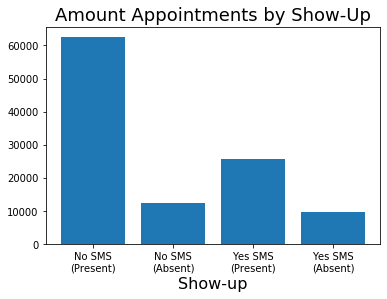

In [108]:
#Study the relation between showup and sms recieved
locations = [1, 2, 3, 4]
values = df.groupby('SMS_received')['No_show'].value_counts()
labels = ['No SMS\n(Present)', 'No SMS\n(Absent)', 'Yes SMS\n(Present)', 'Yes SMS\n(Absent)']
plt.bar([1, 2, 3, 4], values,tick_label=labels)
plt.title('Amount Appointments by Show-Up', fontsize=18)
plt.xlabel('Show-up', fontsize=16);

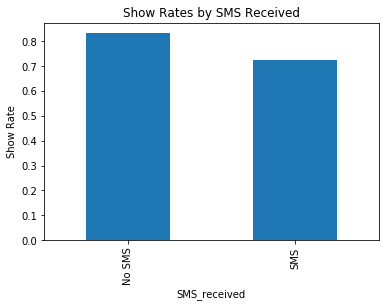

In [88]:
(1-df.groupby('SMS_received').No_show.mean()).plot(kind='bar')
plt.ylabel('Show Rate')
plt.title('Show Rates by SMS Received')
plt.xticks((0,1), ('No SMS','SMS'));

Conclusion: Patients who didn't received SMS had a higher rate of Show-up compared to those who received.

#### Does the duration between the ScheduledDay and AppointmentDay affect in patients no show up ?

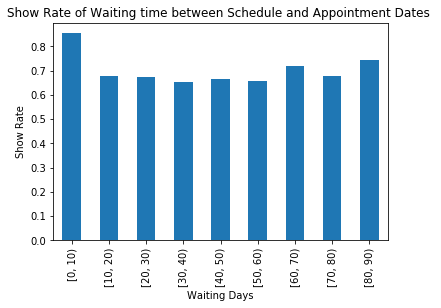

In [50]:
# The Difference between Schedule and Appointment Dates
(1-df.groupby('WaitingTime').No_show.mean()).plot(kind='bar')
plt.title('Show Rate of Waiting time between Schedule and Appointment Dates ')
plt.xlabel('Waiting Days')
plt.ylabel('Show Rate');

Conclusion: Patients with appointment day within 1-10 days from schedule day have maximum show rate.

#### Does the AppointmentDay affect in patients no show up ?

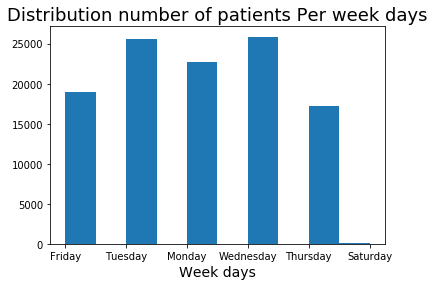

In [91]:
#study the distribution of appointments during the week days
plt.hist(df['WeekDay']);
plt.title('Distribution number of patients Per {}'.format('week days'), fontsize=18)
plt.xlabel('{}'.format('Week days'), fontsize=14);

Conclusion: Tuesdays and Wednesdays are the days that receive the most appointments. Mondays and Fridays are the days with the highest no-show rates and decreased on Saturday maybe because it's a weekend.

#### Does the scholarship affect in patients no show up ?

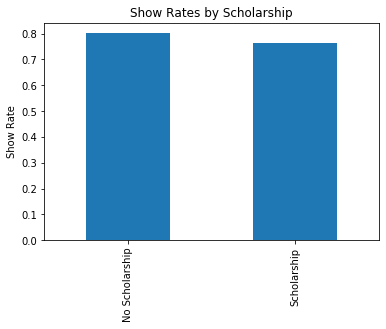

In [93]:
(1-df.groupby('Scholarship').No_show.mean()).plot(kind='bar')
plt.ylabel('Show Rate')
plt.title('Show Rates by Scholarship')
plt.xlabel('')
plt.xticks((0,1), ('No Scholarship','Scholarship'));

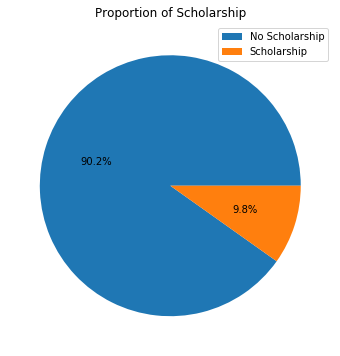

In [95]:
df.groupby('Scholarship').Scholarship.count().plot(kind='pie', legend=False, title='Proportion of Scholarship', autopct='%.1f%%',figsize=(6,6),labels=None)
plt.ylabel('')
plt.legend(['No Scholarship','Scholarship']);

Conclusion: The above two graphs show that patients with scholarship have a higher no-show up rate.

<a id='conclusions'></a>
## Conclusions
- There's a small significant difference in a no-show and show up patient's age.
- SMS doesn't help to increase the show-up rate.
- Patients who don't have a scholarship have a higher show-up rate.
- Weekends have a low showup rate and it's a good indicator of show up.
- Patients with 1-10 Waiting time have a high show rate and it's also a good indicator of show-up rate.

No statistical tests were done in this investigation

### Limitations:
-Data contains outliers such as patient age.
-Data only about the year 2016, we need data about more years for better analysis and build prediction models in the future.
-There's missing information about the patient which could help to impact patient no-show such as: if the clinic is located nearby or not, he has a car or there's available transportation to the clinic. 
-also, If the patient has a family or someone cares about him, it's maybe a factor